In [234]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
file_names = os.listdir('./data/database/')

In [169]:
target_size = (400,400)
color = True

In [170]:
images = [ cv2.resize(cv2.imread('./data/database/'+str(path),int(color)), target_size) for path in file_names ]

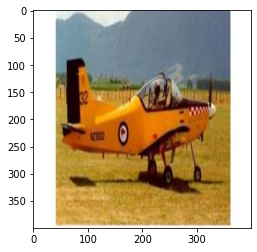

In [171]:
plt.figure()
img2 = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB )
plt.imshow(img2)
plt.show()

## HOG

In [172]:
hog = cv2.HOGDescriptor()

In [173]:
hogs = [ hog.compute(im) for im in images ]

In [251]:
query = cv2.resize(cv2.imread('./data/face_query.jpg', int(color)), target_size)

In [252]:
query_hog = hog.compute(query)

#### Euclidean distance

In [253]:
distances = [np.linalg.norm(database-query_hog) for database in hogs]

In [254]:
sorted_images = np.argsort(distances)

#### Cosine

In [255]:
distances = [cosine_similarity(database.reshape(1, -1),query_hog.reshape(1, -1)) for database in hogs]

In [256]:
distances = [ dist[0][0] for dist in distances ]

In [257]:
sorted_images = np.argsort(distances)

#### Produit scalaire

In [261]:
distances = [np.dot(database,query_hog) for database in hogs]

In [262]:
sorted_images = np.argsort(distances)

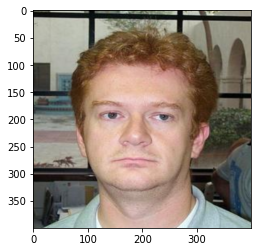

In [263]:
plt.figure()
img2 = cv2.cvtColor(query, cv2.COLOR_BGR2RGB )
plt.imshow(img2)
plt.show()

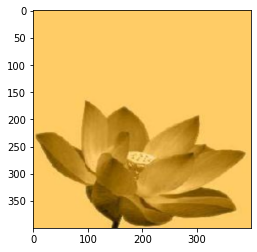

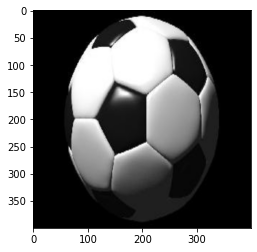

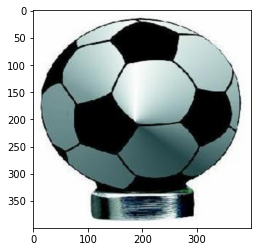

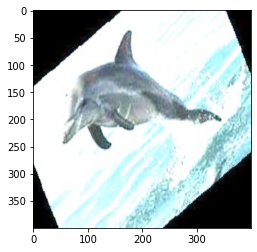

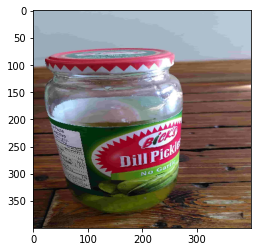

In [264]:
for i in range(5):
    plt.figure()
    img2 = cv2.cvtColor(images[sorted_images[i]], cv2.COLOR_BGR2RGB )
    plt.imshow(img2)
    plt.show()